| **CLASSIFICATION OF SPINAL CONDITIONS** ||-----------------------------------------|
---


> **Description:**  
> The K-Nearest Neighbors (KNN) classifier will be used to create a model that can tell spinal conditions apart, helping improve diagnosis and treatment for spinal disorders. Accuracy of our model is equal to 79.03 %.

---

**Name:** Ayesha Siddiqua  
**Student ID:** U22103855


#### The dataset contains:
***310 instances** and **6 features** related to spinal health.* 


#### Features
1. *Pelvic Incidence*
2. *Pelvic Tilt*
3. *Lumbar Lordosis Angle*
4. *Sacral Slope*
5. *Pelvic Radius*
6. *Degree of Spondylolisthesis*

#### Spinal Condition Categories
1. *Normal (NO)* - Patients without any spinal issues.
2. *Disk Hernia (DH)* - Patients with a herniated disc.
3. *Spondylolisthesis (SL)* - Patients with vertebrae that have slipped.

In [1]:
# importing necessary libraries


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score



### **1. Data Preprocessing**

**Loading the Dataset**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# loading the dataset

# read the file into a dataframe 
df = pd.read_csv('vertebral_column.csv')

# display the dataframe to check if it was loaded correctly
print(df.head())


   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0             63.03        22.55                  39.61         40.48   
1             39.06        10.06                  25.02         29.00   
2             68.83        22.22                  50.09         46.61   
3             69.30        24.65                  44.31         44.64   
4             49.71         9.65                  28.32         40.06   

   pelvic_radius  degree_spondylolisthesis spinal_condition  
0          98.67                     -0.25               DH  
1         114.41                      4.56               DH  
2         105.99                     -3.53               DH  
3         101.87                     11.21               DH  
4         108.17                      7.92               DH  


**Handling Missing Values**

In [5]:
# check for missing values in the dataframe
missing_values = df.isnull().sum()

# display the count of missing values for each column
print(missing_values)

# check if there are any missing values
if missing_values.sum() == 0:
    print("\nNo missing values.")
else:
    print("\nMissing values found.")


pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
spinal_condition            0
dtype: int64

No missing values.


**Data Preprocessing**

In [7]:
# FEATURES & TARGETS COLUMNS

features = df.columns[:-1]  
target = df.columns[-1]     

# Data preprocessing
x = df.iloc[:, :-1].values # feature values
y = df.iloc[:, -1].values # target values

**Label Encoding**

In [9]:
# Convert categorical labels to numerical values using label encoding:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# TARGET LABELS: Disk Hernia -> 0, Normal -> 1, Spondylolisthesis -> 2.
y = le.fit_transform(y)

**Normalization/Scaling & Train-Test Split**

In [11]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Feature scaling 
# This ensures equal weight for each feature and improves model performance.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


### **2. Visualization**

**Summary Statistics**

In [ ]:
# Summary Statistics - count, mean, standard deviation, min, max and quartiles for each numerical feature.
df.describe()

**Histograms of Features**

In [ ]:
# Histograms of Features

plt.figure(figsize=(12, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

**Pairplot**

In [ ]:
# 2. Pairplot
sns.pairplot(df, hue=target, diag_kind='kde')
plt.title('Pairplot of Features')
plt.show()

**Boxplots**

In [ ]:
# 3. Boxplots
plt.figure(figsize=(12, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=target, y=feature, data=df)
    plt.title(f'{feature} vs spinal_condition')
plt.tight_layout()
plt.show()

Some features exhibit overlaps, making classification harder. There also exist outliers.

**Correlation Matrix Heatmap**

In [ ]:
# 4. Correlation Matrix Heatmap

# Create a temporary column for the target variable by encoding it
le = LabelEncoder()
df['SPINAL CONDITION'] = le.fit_transform(df[target])

plt.figure(figsize=(12, 8))

# Calculate the correlation matrix, dropping the original target column
correlation_matrix = df.drop(columns=[target]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Remove 'temp_target' column from DataFrame directly (inplace)
df.drop(columns=['SPINAL CONDITION'], inplace=True)


##### **CORRELATION ANALYSIS OF FEATURES AGAINST SPINAL CONDITION**

| Feature                     | Correlation | Interpretation                                     |
|-----------------------------|-------------|---------------------------------------------------|
| Pelvic Incidence            | 0.59       | Strong positive — higher values may lead to a higher likelihood of spinal conditions. |
| Lumbar Lordosis Angle       | 0.64       | Strong positive — suggests a significant relationship with spinal conditions. |
| Sacral Slope                | 0.60       | Strong positive — indicates that increased sacral slope may be associated with spinal conditions. |
| Pelvic Tilt                 | 0.21       | Weak positive — suggests a minor relationship with spinal conditions. |
| Pelvic Radius               | -0.13      | Very weak negative — indicates it may not be a significant predictor. |
| Degree of Spondylolisthesis | 0.59       | Moderate positive — indicates a notable relationship with spinal conditions. |

**Summary**

Key features for differentiating spinal conditions include Pelvic Incidence, Degree of Spondylolisthesis, Lumbar Lordosis Angle, and Sacral Slope.


### **3. K-Nearest Neighbors (KNN) Classifier**

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

### KNN classifier using different values of k and test set sizes. For each combination, it splits the data, scales the features, and checks the model’s accuracy using cross-validation. It also calculates accuracy and F1-score on the test data to find the best k and test size for the model.

In [15]:
k_values = [3, 5, 7, 9, 11]
test_sizes = [0.2, 0.25, 0.3]

# Loop through different test sizes
for test_size in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

    # Feature scaling
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    print(f"\nTest Size: {test_size}")

    # Loop through different k values
    for k in k_values:
        # Instantiate KNN classifier
        knn = KNeighborsClassifier(n_neighbors=k)
        
        # Perform cross-validation with k-folds = 5
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
        cv_scores = cross_val_score(knn, x_train, y_train, cv=cv, scoring='accuracy')
        mean_cv_accuracy = np.mean(cv_scores)

        # Train the model and evaluate on the test set
        knn.fit(x_train, y_train)
        test_accuracy = knn.score(x_test, y_test)

        y_pred = knn.predict(x_test)

        # Print the results
        print(f"K: {k}, C-V Mean Accuracy: {mean_cv_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
        f1 = f1_score(y_test, y_pred, average='weighted')  
        print(f"F1 Score: {f1:.4f}")



Test Size: 0.2
K: 3, C-V Mean Accuracy: 0.7864, Test Accuracy: 0.7419
F1 Score: 0.7391
K: 5, C-V Mean Accuracy: 0.7824, Test Accuracy: 0.7903
F1 Score: 0.7889
K: 7, C-V Mean Accuracy: 0.8069, Test Accuracy: 0.7742
F1 Score: 0.7742
K: 9, C-V Mean Accuracy: 0.7946, Test Accuracy: 0.7419
F1 Score: 0.7455
K: 11, C-V Mean Accuracy: 0.7904, Test Accuracy: 0.7903
F1 Score: 0.7934

Test Size: 0.25
K: 3, C-V Mean Accuracy: 0.7803, Test Accuracy: 0.7308
F1 Score: 0.7394
K: 5, C-V Mean Accuracy: 0.7803, Test Accuracy: 0.7436
F1 Score: 0.7457
K: 7, C-V Mean Accuracy: 0.8060, Test Accuracy: 0.7564
F1 Score: 0.7569
K: 9, C-V Mean Accuracy: 0.8017, Test Accuracy: 0.7436
F1 Score: 0.7434
K: 11, C-V Mean Accuracy: 0.8018, Test Accuracy: 0.7436
F1 Score: 0.7409

Test Size: 0.3
K: 3, C-V Mean Accuracy: 0.7646, Test Accuracy: 0.7527
F1 Score: 0.7594
K: 5, C-V Mean Accuracy: 0.7736, Test Accuracy: 0.7527
F1 Score: 0.7537
K: 7, C-V Mean Accuracy: 0.7923, Test Accuracy: 0.7634
F1 Score: 0.7658
K: 9, C-V Mea

> ### Optimal Values for Maximum Test Accuracy:
> #### **Test Size: 0.2**
> #### **k = 11**

#### Since the dataset is imbalanced, as the number of patients in each class varies significantly. Spondylolisthesis has the most patients (150), followed by Normal (100), and Disk Hernia has the least (60). This could lead to the model being biased towards the larger classes if not handled properly.

#### So this combination seems to be the best for classifying the patient groups of Normal, Disk Hernia, and Spondylolisthesis because it yields the highest F1 score (0.7934) and has highest accuracy (0.7903) as well comparitively. This ensures the model effectively identifies and differentiates between all conditions, which is important for accurate diagnosis and treatment.



Test Size: 0.2, k: 11
Cross-Validation Accuracy Scores: [0.64       0.88       0.82       0.81632653 0.79591837]
Mean Accuracy: 0.7904
Standard Deviation: 0.0803
Confusion Matrix:
 [[ 8  3  1]
 [ 5 12  1]
 [ 1  2 29]]
Accuracy of our model is equal to 79.03 %.
              precision    recall  f1-score   support

           0       0.57      0.67      0.62        12
           1       0.71      0.67      0.69        18
           2       0.94      0.91      0.92        32

    accuracy                           0.79        62
   macro avg       0.74      0.75      0.74        62
weighted avg       0.80      0.79      0.79        62

F1 Score: 0.7934
Recall: 0.7903
Precision: 0.7984


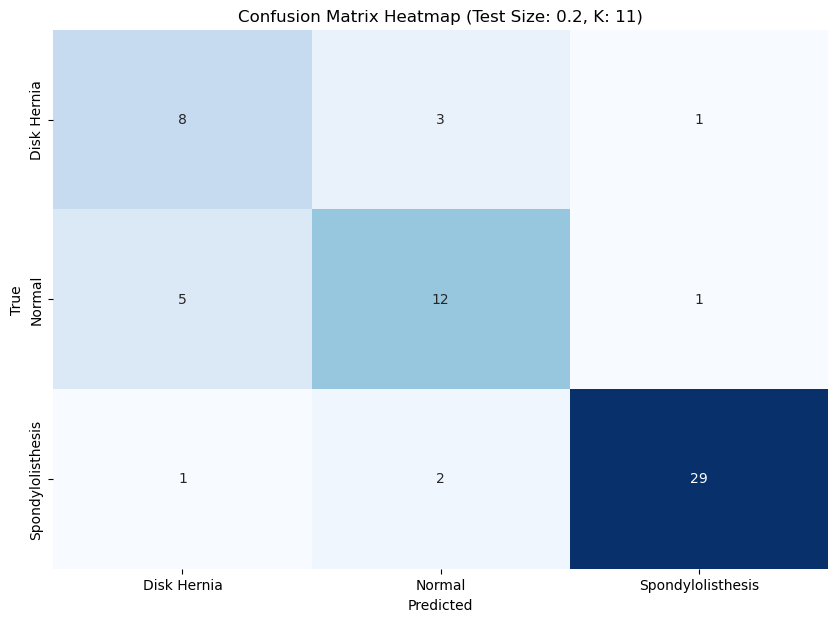

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, recall_score, precision_score


# choosing optimal k and test size value
k_value = 11
test_size = 0.2

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

# Feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# Instantiate and fit the KNN classifier
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(x_train, y_train)

# Perform cross-validation with k-folds = 5
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(classifier, x_train, y_train, cv=cv, scoring='accuracy')

# Evaluate cross-validation results
print(f"Test Size: {test_size}, k: {k}")
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation: {cv_scores.std():.4f}')

# Predicting the Test set results
y_pred = classifier.predict(x_test)

# confusion matrix to summarize the classification results        
CM = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", CM)
        
# ratio of correctly predicted instances to the total instances
accuracy = accuracy_score(y_test, y_pred) * 100 
print(f'Accuracy of our model is equal to {round(accuracy, 2)} %.')

print(classification_report(y_test, y_pred))
        
# F1 score - the harmonic mean of precision and recall
# 'weighted' averaging is used to consider the proportion of each class in the dataset
f1 = f1_score(y_test, y_pred, average='weighted')  
print(f"F1 Score: {f1:.4f}")
        
# Recall measures the ability of the model to identify positive instances       
recall = recall_score(y_test, y_pred, average='weighted')    
print(f"Recall: {recall:.4f}")

# Precision measures the accuracy of positive predictions
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.4f}")

# Plotting the confusion matrix heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', cbar=False, 
                    xticklabels=['Disk Hernia', 'Normal', 'Spondylolisthesis'], 
                    yticklabels=['Disk Hernia', 'Normal', 'Spondylolisthesis'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix Heatmap (Test Size: {test_size}, K: {k})')
plt.show()
        


### Analysis of KNN Classifier:

#### **Cross-Validation Accuracy:**
- The model achieved a **mean cross-validation accuracy of 0.7966 (79.66%)**, indicating good overall performance. 
- The **standard deviation is 0.0732 (7.32%)**, which suggests some variability in how well the model performs across different subsets of the training data. 

#### **Confusion Matrix:**

|              | Predicted: Disk Hernia (0) | Predicted: Normal (1) | Predicted: Spondylolisthesis (2) |
|--------------|----------------------------|-----------------------|-----------------------------------|
| Actual: 0    | 8                          | 3                     | 1                                 |
| Actual: 1    | 5                          | 12                    | 1                                 |
| Actual: 2    | 1                          | 2                     | 29                                |

- **Correct Predictions (diagonal values)**:
   - **Disk Hernia (Class 0)**: 8 correctly predicted.
   - **Normal (Class 1)**: 12 correctly predicted.
   - **Spondylolisthesis (Class 2)**: 29 correctly predicted.

- **Misclassifications (non-diagonal values)**:
   - **Disk Hernia (Class 0)**: 3 misclassified as Normal, 1 as Spondylolisthesis.
   - **Normal (Class 1)**: 5 misclassified as Disk Hernia, 1 as Spondylolisthesis.
   - **Spondylolisthesis (Class 2)**: 2 misclassified as Normal, 1 as Disk Hernia.

### **Insights:**
- The model performs best in predicting **Spondylolisthesis (Class 2)** with 29 correct predictions.
- There is notable confusion between **Normal** and **Disk Hernia**, as 5 Normal cases are misclassified as Disk Hernia and 3 Disk Hernia cases are misclassified as Normal.
- Improving the model’s ability to distinguish between Normal and Disk Hernia may enhance overall performance.

#### **Performance Metrics:**
The model79.03 as an overall **accuracy of 79%**.

- **Precision**:
  - **Disk Hernia (Class 0)**: 0.57 (57%) – Precision is moderate but leaves room for improvement.
  - **Normal (Class 1)**: 0.71 (71%) – Slightly better but still not very high.
  - **Spondylolisthesis (Class 2)**: 0.94 (94%) – Very high precision, meaning most positive predictions for this class are correct.

- **Recall**:
  - **Disk Hernia (Class 0)**: 0.67 (67%) – The model misses a few actual Disk Hernia cases.
  - **Normal (Class 1)**: 0.67 (67%) – Good recall, indicating that the model identifies most Normal cases.
  - **Spondylolisthesis (Class 2)**: 0.91 (91%) – Excellent recall, capturing almost all true instances of this class.

- **F1 Score**:
  - **Disk Hernia (Class 0)**: 0.62 – Reflects a balance between precision and recall.
  - **Normal (Class 1)**: 0.69 – A moderate F1 score indicates a better balance between precision and recall.
  - **Spondylolisthesis (Class 2)**: 0.92 – High F1 score indicates excellent performance for this class.

The **overall F1 score** is **0.7934**, showing balanced performance across classes.

#### **Macro-Average (Unweighted)**:
This gives equal weight to each class, regardless of its frequency.
- **Average Precision**: 0.74
- **Average Recall**: 0.75
- **Average F1 Score**: 0.74

These values show the performance across all classes, without accounting for the class imbalance.

#### **Weighted Average**:
This accounts for the number of instances in each class.
- **Average Precision**: 0.80
- **Average Recall**: 0.79
- **Average F1 Score**: 0.79

The weighted averages reflect the model’s better performance on the more frequent class (Spondylolisthesis) but may hide weInferencehandling minority classes like Disk Hernia.

### **Key Takeaways**:
- The model performs best in predicting Spondylolisthesis, with strong precision, recall, and F1 scores.
- There’s noticeable confusion between Disk Hernia and Normal, is required onich affects the model’s overall performance.
- To improve, focus on increasing the model’s ability to distinguish between Disk Hernia and Normal. This could involve experimenting with additional features, different algorithms, or adjusting the class weighting to better handle the class imbalance.


# ROC Curve and AUC (Area Under the Curve)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# Predict class probabilities for the test dataset using the fitted model.
y_pred_proba = classifier.predict_proba(x_test)

# Binarize the true class labels for multiclass ROC analysis.
# 'label_binarize' transforms the true labels into a binary format where each class is represented as a separate column.
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Determine the number of classes from the binarized true labels.
n_classes = y_test_binarized.shape[1]

# Output the shape of the binarized labels to verify the transformation.
print(f"Binarized true labels shape: {y_test_binarized.shape}")  

# Create a new figure for plotting the ROC curves.
plt.figure(figsize=(10, 8))

# Loop through each class to calculate and plot the ROC curve.
for i in range(n_classes):
    # Calculate the False Positive Rate (FPR) and True Positive Rate (TPR) for the current class.
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    
    # Calculate the AUC (Area Under the Curve) for the current class.
    auc = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
    
    # Plot the ROC curve for the current class with a label indicating the AUC value.
    plt.plot(fpr, tpr, label=f'ROC curve for class {i} (area = {auc:.2f})')

# Configure the plotting parameters for better visualization.
plt.plot([0, 1], [0, 1], 'k--')  # Add a diagonal line representing random chance.
plt.xlim([0.0, 1.0])  # Set the x-axis limits.
plt.ylim([0.0, 1.05])  # Set the y-axis limits.
plt.xlabel('False Positive Rate')  # Label for the x-axis.
plt.ylabel('True Positive Rate')  # Label for the y-axis.
plt.title('Receiver Operating Characteristic (ROC) Curves')  # Title of the plot.
plt.legend(loc='lower right')  # Display legend in the lower right corner.
plt.show()  # Display the plot.


## Classes and ROC Curve:

### ROC Curve Summary:

| Class                | Color         | AUC  | Performance Description                                                                                   |
|----------------------|---------------|------|-----------------------------------------------------------------------------------------------------------|
| Disk Hernia          | Blue          | 0.90 | The ROC curve shows a good trade-off between the true positive rate and the false positive rate.          |
| Normal               | Orange        | 0.85 | The ROC curve is lower than the others, indicating difficulty in correctly classifying Normal patients.    |
| Spondylolisthesis    | Green         | 0.97 | The ROC curve is very close to the top-left corner, indicating excellent classification performance.       |

## Interpretation of the ROC Curves:
- The closer the ROC curve is to the upper left corner, the better the model is at distinguishing that class from the others. In this case, the ROC curve for Spondylolisthesis (Class 2) shows the best performance, followed by Disk Hernia (Class 0), while the curve for Normal (Class 1) shows relatively weaker performance.
- A diagonal line represents random guessing, and all three ROC curves are well above it, confirming that the model has skill in classification.

## Threshold Sensitivity:
- ROC curves evaluate the model's performance across all possible decision thresholds, so even though some classes (like Normal) might have lower precision or recall at a particular threshold, the overall ability to separate the classes (as shown by the ROC curve) remains good.

In summary, while the ROC curve and AUC indicate that the model generally discriminates well between the three conditions (Disk Hernia, Normal, and Spondylolisthesis), the classification of Normal patients could still be improved based on the slight drop in performance seen in the ROC curve and AUC for this class.


# Analyzing Feature Correlations with Spinal Conditions

In [ ]:

# Extract correlation of features with the target variable
target_correlation = correlation_matrix['SPINAL CONDITION'].drop('SPINAL CONDITION').sort_values(ascending=False)

# Create a DataFrame for better visualization
feature_correlation_df = pd.DataFrame({
    'Feature': target_correlation.index,
    'Correlation': target_correlation.values
})

# Plot the feature correlations
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Feature', data=feature_correlation_df, hue='Feature', palette='viridis', legend=False)

plt.title('Feature Correlation with Spinal Conditions')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()




# User Input for Spinal Condition Prediction

In [ ]:
import pandas as pd

def predict_outcome():
    print("\nEnter the following details to predict the spinal condition:")
    
    PELVIC_INCIDENCE = float(input("Pelvic Incidence: "))
    PELVIC_TILT = float(input("Pelvic Tilt: "))
    LUMBAR_LORDOSIS_ANGLE = float(input("Lumbar Lordosis Angle: "))
    SACRAL_SLOPE = float(input("Sacral Slope: "))
    PELVIC_RADIUS = float(input("Pelvic Radius: "))
    DEGREE_OF_SPONDYLOLISTHESIS = float(input("Degree of Spondylolisthesis: "))

    # Create a DataFrame for the input data
    user_data = pd.DataFrame([[PELVIC_INCIDENCE, PELVIC_TILT, LUMBAR_LORDOSIS_ANGLE, 
                                SACRAL_SLOPE, PELVIC_RADIUS, DEGREE_OF_SPONDYLOLISTHESIS]],
                              columns=['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
                                       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'])
    
    
   
    user_data_scaled = scaler.transform(user_data) 
    
    # Predict the outcome
    outcome = classifier.predict(user_data_scaled)
    
    # Map numerical outcomes to spinal conditions
    condition_map = {0: "Disk Hernia (DH)", 1: "Normal (NO)", 2: "Spondylolisthesis (SL)"}
    predicted_condition = condition_map[int(outcome[0])]
    
    print(f"\nPredicted Spinal Condition: {predicted_condition}")

# Call the prediction function
predict_outcome()
